### Problema

Para empezar la empresa quiere investigar las diferencias clave entre los empleados que han dejado la organización y los que permanecen en ella. Para ello, nos han pedido que realicemos una serie de análisis los cuales tenemos descritos a continuación: 

1. ¿Existe una diferencia en la edad promedio entre los empleados que han dejado la empresa y los que no?

2. ¿Existe una diferencia en el ingreso mensual promedio entre empleados que han dejado la empresa y los que no?

3. ¿Existe una diferencia en la proporción de empleados que hacen horas extras entre los que han dejado la empresa y los que no?

4. ¿Existe una diferencia en los años promedio trabajados con el mismo gerente entre empleados que han dejado la empresa y los que no?

5. ¿Existe una diferencia en los años desde la última promoción entre los empleados que han dejado la empresa y los que no?

Basándonos en los resultados de los análisis anteriores, escribe aquellos factores que parecen estar más asociados con los empleados que han dejado la empresa en comparación con los que se han quedado.

Llegados a este punto, ya sabemos y hemos identificado algunos patrones importantes entre los empleados que han dejado la empresa y los que no. Investiguemos ahora que esta ocurriendo entre los empleados que han dejado la empresa a traves de las siguientes preguntas: 

- Analiza a los empleados que tienen más de 10 años de experiencia en la empresa y examina cómo varía su tasa de incremento salarial y sus horas estándar de trabajo según su nivel de satisfacción laboral y estado civil.

- Ahora deberéis focalizaros en los empleados casados que tienen una alta satisfacción con su entorno laboral y que pertenecen al departamento de `'Research & Development'`. Deberéis evaluar cómo varían el tiempo desde su última promoción y los años que han estado en su rol actual según su género.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Esto es para poder hacer gráficos
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv("datos/IBM_HR_Employee_Attrition_full.csv")
pd.set_option("display.max_columns", None)
df.head(10)

,Unnamed: 0,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,Age,EmployeeId,DateEmployment,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Over18,NumCompaniesWorked,Country,Sons,Attrition,BusinessTravel,DailyRate,Department,EmployeeCount,HourlyRate,JobLevel,JobRole,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
0,0,21,Bachelor,Other,Male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,2000-01-13 02:53:47,14,0,0,1,NaN,1.0,Austria,1,Yes,Travel_Rarely,419.0,Sales,1,37,1,Sales Representative,2121,9947,Yes,13,80.0,0,3,Very High,Medium,Medium,Excellent,Medium
1,1,25,College,Technical Degree,Female,Married,30,0722da7a-530b-41dd-b705-c79f7627f677,2000-01-17 03:53:10,16,0,0,4,Y,7.0,España,1,No,Non-Travel,641.0,Sales,1,85,2,Sales Executive,4736,6069,Yes,12,80.0,1,2,Very High,High,High,Excellent,Medium
2,2,1,College,Life Sciences,Male,Single,22,b5fed13f-7785-4daf-bb8c-1037f84e5fa7,2000-01-21 05:42:21,20,0,0,4,Y,0.0,República Checa,1,No,Travel_Rarely,581.0,Research & Development,1,63,1,Research Scientist,3375,17624,No,12,80.0,0,2,Very High,High,High,Excellent,Very High
3,3,4,College,Technical Degree,Male,Married,42,4b0a1169-b286-44fb-a453-b97ca934db57,2000-01-28 16:59:19,11,1,5,22,NaN,1.0,Misisipi,1,No,Travel_Rarely,532.0,Research & Development,1,58,5,Manager,19232,4933,No,11,80.0,0,3,High,High,Very High,Excellent,Very High
4,4,2,Master,Life Sciences,Female,Single,36,6affb754-8e52-43a7-9e97-4e373ef5fccb,2000-02-02 22:58:25,13,0,7,17,NaN,3.0,Portugal,1,No,Travel_Rarely,530.0,Sales,1,51,2,Sales Representative,4502,7439,No,15,80.0,0,2,High,High,Very High,Excellent,High
5,5,10,Bachelor,Medical,Male,Single,32,098c5463-e599-44ad-95f7-922ffe4b3d20,2000-02-06 14:19:30,15,0,0,10,NaN,2.0,Noruega,0,No,Travel_Rarely,495.0,Research & Development,1,64,3,Manager,11244,21072,No,25,80.0,0,5,High,High,Very High,Outstanding,Medium
6,6,6,Bachelor,Medical,Female,Married,43,69658f26-48fa-4573-8317-2668b70f54a9,2000-02-14 15:46:42,4,0,6,21,NaN,7.0,Italia,0,No,Travel_Rarely,NaN,Research & Development,1,81,5,Manager,19392,22539,No,13,80.0,0,2,Low,Medium,High,Excellent,Very High
7,7,28,Below College,Medical,Male,Married,50,e3b6a3f7-9046-494f-a3a3-396caa04c5b8,2000-02-19 14:51:34,2,0,2,20,Y,1.0,Bélgica,1,No,Travel_Rarely,1207.0,Research & Development,1,74,1,Laboratory Technician,3221,3297,Yes,11,80.0,3,3,Very High,Very High,High,Excellent,High
8,8,6,Bachelor,Medical,Female,Divorced,38,0ce9edf2-7655-47ab-918d-2e6f511ace72,2000-02-22 11:00:45,4,0,8,17,NaN,7.0,Croacia,1,No,Non-Travel,573.0,Research & Development,1,79,2,Research Scientist,5329,15717,Yes,12,NaN,3,3,Medium,Low,Very High,Excellent,Very High
9,9,9,Master,Life Sciences,Male,Married,41,4c27df95-d97d-4165-8792-f39a3477a650,2000-03-04 21:27:50,23,1,1,7,Y,2.0,Grecia,0,No,Travel_Rarely,933.0,Research & Development,1,94,1,Laboratory Technician,2238,6961,No,21,NaN,1,2,High,High,Low,Outstanding,Very High


In [16]:
filtro1 = df["Attrition"] == "Yes"
filtro2 = df["Attrition"] == "yes"

df_desempleado = df[filtro1|filtro2]
df_desempleado.head(1)

,Unnamed: 0,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,Age,EmployeeId,DateEmployment,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Over18,NumCompaniesWorked,Country,Sons,Attrition,BusinessTravel,DailyRate,Department,EmployeeCount,HourlyRate,JobLevel,JobRole,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
0,0,21,Bachelor,Other,Male,Single,19,70b8db40-4f58-476f-8776-c00802b0cdb9,2000-01-13 02:53:47,14,0,0,1,NaN,1.0,Austria,1,Yes,Travel_Rarely,419.0,Sales,1,37,1,Sales Representative,2121,9947,Yes,13,80.0,0,3,Very High,Medium,Medium,Excellent,Medium


In [17]:
filtro1 = df["Attrition"] == "No"
filtro2 = df["Attrition"] == "no"

df_empleado = df[filtro1|filtro2]
df_empleado.head(1)

,Unnamed: 0,DistanceFromHome,Education,EducationField,Gender,MaritalStatus,Age,EmployeeId,DateEmployment,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Over18,NumCompaniesWorked,Country,Sons,Attrition,BusinessTravel,DailyRate,Department,EmployeeCount,HourlyRate,JobLevel,JobRole,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
1,1,25,College,Technical Degree,Female,Married,30,0722da7a-530b-41dd-b705-c79f7627f677,2000-01-17 03:53:10,16,0,0,4,Y,7.0,España,1,No,Non-Travel,641.0,Sales,1,85,2,Sales Executive,4736,6069,Yes,12,80.0,1,2,Very High,High,High,Excellent,Medium


1. ¿Existe una diferencia en la edad promedio entre los empleados que han dejado la empresa y los que no?

In [18]:
df_empleado.describe().T.head(1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1233.0,732.562044,424.681016,1.0,365.0,730.0,1093.0,1469.0


In [19]:
df_desempleado.describe().T.head(1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,237.0,744.582278,424.290633,0.0,391.0,751.0,1127.0,1457.0


Edad media de los empleados = 37.5

Edad media de los que han dejado la empresa = 33.6

La mediana y la media de ambos datos son muy próximas.


2. ¿Existe una diferencia en el ingreso mensual promedio entre empleados que han dejado la empresa y los que no?

Sueldo mensual promedio de los empleados = 6832.7 y la mediana 5204

Sueldo mensual promedio de los que han dejado la empresa = 4787.1 y la mediana 3202.


3. ¿Existe una diferencia en la proporción de empleados que hacen horas extras entre los que han dejado la empresa y los que no?

In [10]:
df_empleado["OverTime"].value_counts()/df_empleado.shape[0]*100

OverTime
No     76.561233
Yes    23.438767
Name: count, dtype: float64

In [11]:
df_desempleado["OverTime"].value_counts()/df_desempleado.shape[0]*100

OverTime
Yes    53.586498
No     46.413502
Name: count, dtype: float64

De los empleados el 23.4% hacen horas extra.

De los que han dejado la empresa el 53.6% hacían horas extra.

4. ¿Existe una diferencia en los años promedio trabajados con el mismo gerente entre empleados que han dejado la empresa y los que no?

Los empleados han estado una media de 2.2 años con su actual manager.

Los que han dejado la empresa han estado una media de 1.4 años con su último manager.

5. ¿Existe una diferencia en los años desde la última promoción entre los empleados que han dejado la empresa y los que no?

Los empleados tienen una media de 1.1 años desde la ultima promocion.

Los que han dejado la empresa tenían una media de 0.9 años desde la ultima promocion.

In [20]:
filtro = df_desempleado["TotalWorkingYears"] > 10
df_desempleado_10 = df_desempleado[filtro]
df_desempleado_10.groupby(["JobSatisfaction", "MaritalStatus"]).mean(numeric_only=True)[["StandardHours", "PercentSalaryHike"]].head(1)

,,StandardHours,PercentSalaryHike
JobSatisfaction,MaritalStatus,,
High,Divorced,80.0,16.5


In [21]:
filtro = df_desempleado["MaritalStatus"] == "Married"
filtro1 = df_desempleado["EnvironmentSatisfaction"] == "High"
filtro2 = df_desempleado["Department"] == "Research & Development"
df_desempleado_casado_reach = df_desempleado[filtro & filtro1 & filtro2]
df_desempleado_casado_reach.groupby("Gender").mean(numeric_only=True)[["YearsSinceLastPromotion", "YearsInCurrentRole"]].head(1)

,YearsSinceLastPromotion,YearsInCurrentRole
Gender,,
Female,0.5,3.666667


In [14]:
df_desempleado_casado_reach.groupby("Gender").median(numeric_only=True)[["YearsSinceLastPromotion", "YearsInCurrentRole"]]

,YearsSinceLastPromotion,YearsInCurrentRole
Gender,,
Female,0.0,2.5
Male,0.0,2.0


***Facts:***  
  
Hemos comprobado que los empleados que abandonaron la empresa en media son más jóvenes (33,6 frente a 37,5), cobraban menos (4787,1 frente a 6832,7) pero ambos tienen datos atípicos al alza (Es decir, alguna persona que cobra mucho y descuadra la media), muchos de ellos hacían horas extras (53,6% frente al 23,4% de los empleados actuales), han estado menos años con el mismo manager(1,4 años frente a 2,2 años) y han sido promoconados en menos de un año frente al año de un empleado actual.

Además los que abandonaron 

**Conclusiones:**  

Estos datos nos pueden indicar que los empleados que abandonaron la empresa pudieron tener como aliciente las malas condiciones salariales y de cumplimiento de horas pactadas en el contrato. Además, la empresa parece haberse centrado en promocionar más rápido a estos disertantes (esto a su vez explica porque están menos años en media con el mismo manager) lo que podría estar desequilibrando el ratio salario-responsabilidades lo que podría ser otra razón. Como posible solución IBM podría restructurar sus sistemas de recompensas y que cada promoción venga acompañada de un equilibrio entre el aumento de carga de trabajo y el aumento salarial.




Sobre los empleados que llevan más de 10 años en la empresa, se observa como los solteros cuentan con  



***GRAFICOS***


*Comparar categórica con numérica*

***Boxplot***

C:\Users\jaime\AppData\Local\Temp\ipykernel_14920\2116370163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age",


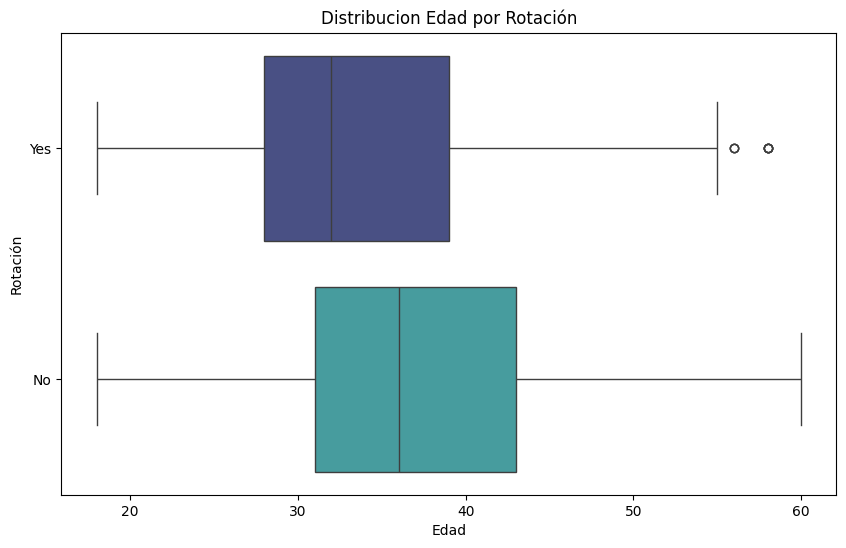

In [40]:
plt.figure(figsize= (10,6))
sns.boxplot(x="Age",
            y="Attrition",
            data= df,
            palette= 'mako')                 
plt.title("Distribucion Edad por Rotación")
plt.xlabel("Edad")
plt.ylabel("Rotación")
plt.show()

- Mediana: linea central de la caja
- Cuartil 25%: linea baja de la caja
- Cuartil 75%: linea alta de la caja
- Max y Min (de los valores regulares): Las líneas que forman un intervalo
- Valor atípico: Los puntos

***Barplot***

C:\Users\jaime\AppData\Local\Temp\ipykernel_14920\1160316102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "Attrition",


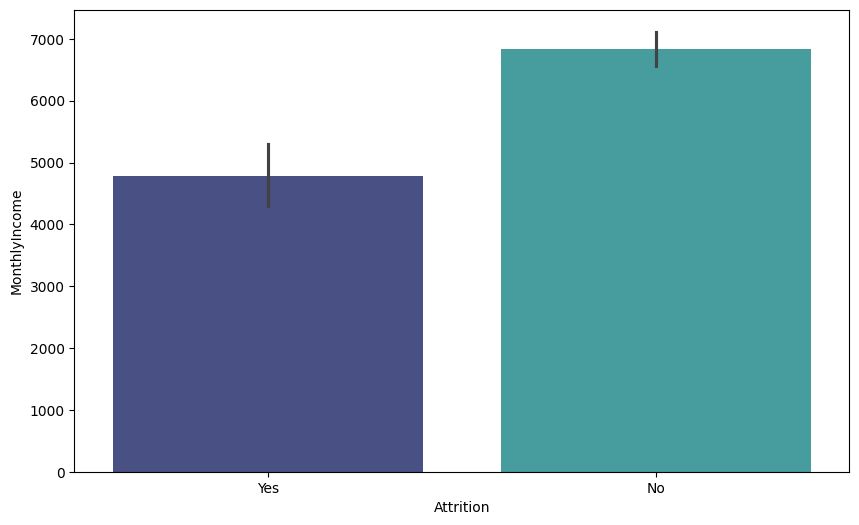

In [39]:
plt.figure(figsize= (10,6))
sns.barplot(x= "Attrition",
            y= "MonthlyIncome",
            data= df,
            palette= "mako");

- La línea: es un intervalo de confianza al 95% ci= 99% nos daría un nivel de confianza al 99% (También errorbar("ci"= 99)) También se puede elegir que queremos que represente la línea (ci es Intervalo e confianza, std es la desviación típico, None si no queremos q salgan) 
- La media: es hasta donde llega la barra

<Axes: xlabel='Attrition', ylabel='percent'>

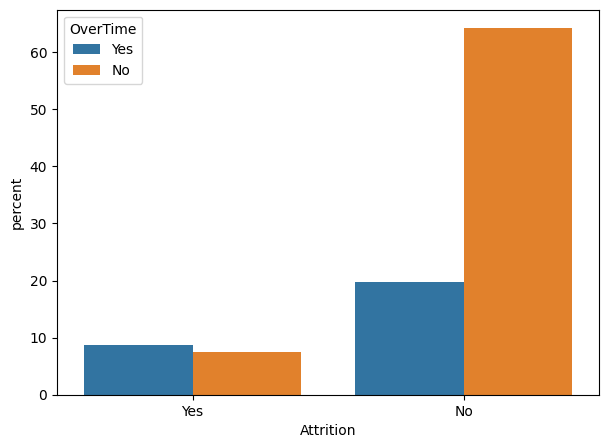

In [52]:
plt.figure(figsize= (7,5))
sns.countplot(x= "Attrition",
              hue= "OverTime",      #Al añadir el hue nos está haciendo un groupby automáticamente
              data= df,
              )      #stat= "percent" es para cambiar el eje a porcentajes(Pero CUIDADO que no me cambian los valores, habría que darselo en porcentaje)

**Para mostrar gráficos seguidos y q se puedan comparar**

C:\Users\jaime\AppData\Local\Temp\ipykernel_14920\3326598531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "Attrition",y= "MonthlyIncome",data= df,palette= "mako", ax= axes[0][1])  #El ; es para que no salga la info del g´rafico escrito arriba


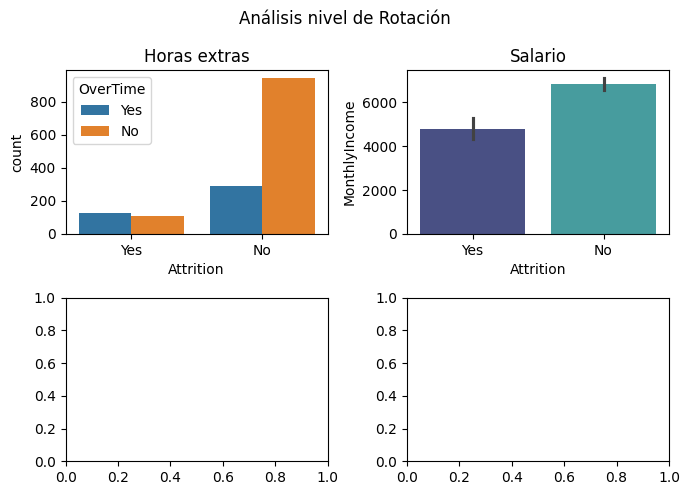

In [80]:
fig, axes= plt.subplots(2,2,figsize= (7,5))       #Axes es como una lista de graficos por eso ponemos uno en el índice 0 el primer 2 es número de filas y el segundo de columnas
sns.countplot(x= "Attrition",hue= "OverTime", data= df, ax = axes[0][0]) 
sns.barplot(x= "Attrition",y= "MonthlyIncome",data= df,palette= "mako", ax= axes[0][1])  #El ; es para que no salga la info del g´rafico escrito arriba 
                                         #Esto optimiza el espacio para que no se 
axes[0][0].set_title("Horas extras")
axes[0][1].set_title("Salario")
plt.suptitle("Análisis nivel de Rotación")     #Esto te pone un título comun da los dos gráficos
plt.tight_layout();                                                      


<Axes: xlabel='Age', ylabel='MonthlyIncome'>

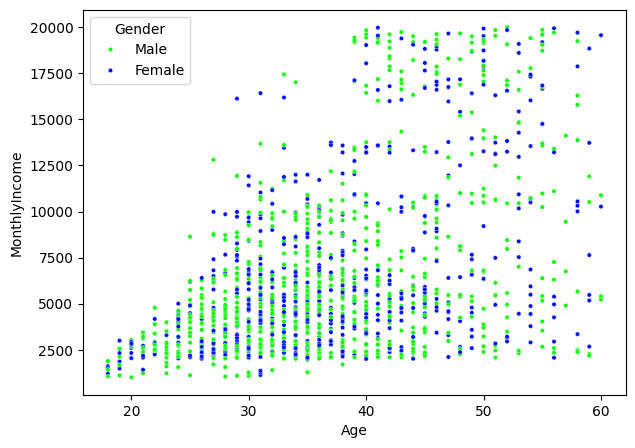

In [89]:
plt.figure(figsize= (7,5))
sns.scatterplot(x= "Age", y = "MonthlyIncome",hue= "Gender", palette="hsv", data= df, s=10)    #La s es para cambiar el tamaño de los puntos En el hue siempre tienen q ir categoricos

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

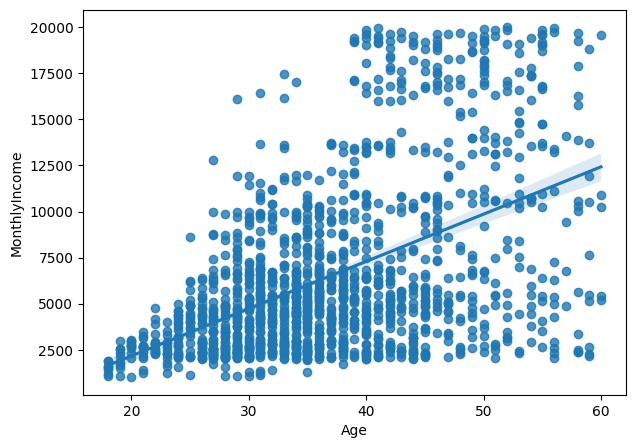

In [88]:
plt.figure(figsize= (7,5))
sns.regplot(x= "Age", y = "MonthlyIncome", data= df)    #La s es para cambiar el tamaño de los puntos En el hue siempre tienen q ir categoricos